# Character recognition using CNN

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import accuracy_score, precision_score,mean_squared_error

In [2]:
# loading mnist dataset
mnist=tf.keras.datasets.mnist
# unpack the dataset into traing and test dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

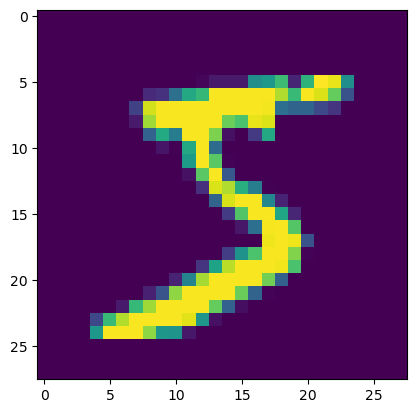

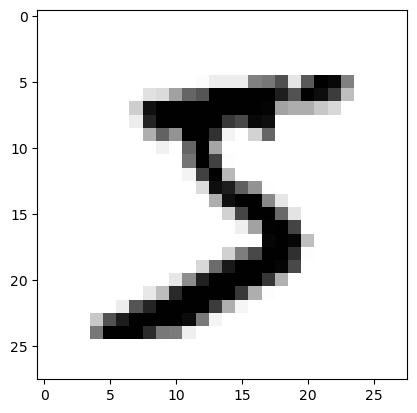

In [4]:
#how the data looks like
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

#however we dont know whether its color image or binary image
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [5]:
#check the value of each pixel before normalizing 
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### #perprocessing and normalizing the dataset

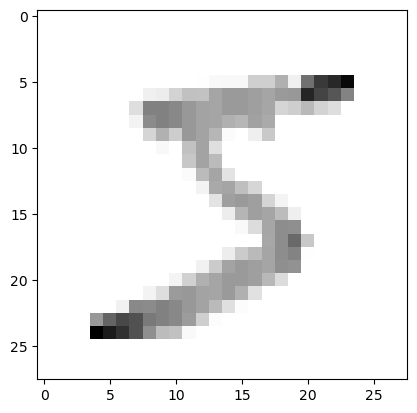

In [6]:
# it is a gray image hence the values varies from 0 to 255
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0],cmap = plt.cm.binary)

In [7]:
#check the value of each pixel after normalizing 
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
print(y_train[0])

5


### #resizing the image to make it suitable for apply convolution operation

In [9]:
img_size=28
x_trainr=np.array(x_train).reshape(-1,img_size,img_size,1)
x_testr=np.array(x_test).reshape(-1,img_size,img_size,1)
print("training sample dimentions",x_trainr.shape)
print("testing sample dimentions",x_testr.shape)

training sample dimentions (60000, 28, 28, 1)
testing sample dimentions (10000, 28, 28, 1)


### #creating a neural network

In [10]:
model= Sequential()

#first convolution layer 0 1 2 3 (60000,28,28,1) 28-3+1=26*26
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu")) #actvation function make it non-linear
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#fully connected layer #1
model.add(Flatten())#before using fully connected layer we need to flatten so that it converts from 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))

#fully connected layer #2
model.add(Dense(32))
model.add(Activation("relu"))

#fully connected layer , output layer must be equal to the number of classes, 10(0-9)
model.add(Dense(10))
model.add(Activation("softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [13]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [31]:
model.fit(x_trainr,y_train,epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0194 - accuracy: 0.9936 - val_loss: 0.0611 - val_accuracy: 0.9838
Epoch 2/5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.0917 - val_accuracy: 0.9778
Epoch 3/5
1313/1313 [==============================] - 14s 10ms/step - loss: 0.0157 - accuracy: 0.9947 - val_loss: 0.0601 - val_accuracy: 0.9857
Epoch 4/5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.0626 - val_accuracy: 0.9854
Epoch 5/5
1313/1313 [==============================] - 14s 10ms/step - loss: 0.0128 - accuracy: 0.9957 - val_loss: 0.0676 - val_accuracy: 0.9852


In [46]:
#evaluating the model
test_loss,test_acc= model.evaluate(x_testr,y_test)
print("test loss on 10000 test samples: ",test_loss)
print("validation accuracy on 10000 test samples: ",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0631 - accuracy: 0.9863
test loss on 10000 test samples:  0.06306081265211105
validation accuracy on 10000 test samples:  0.986299991607666


In [33]:
prediction= model.predict([x_testr])
print(prediction)

313/313 [==============================] - 1s 3ms/step
[[1.3499827e-13 9.1264954e-11 2.9873359e-10 ... 1.0000000e+00
  1.9497494e-13 6.2680279e-09]
 [5.6046932e-08 2.3085299e-08 9.9999845e-01 ... 1.2277886e-06
  5.5498450e-08 5.8884941e-09]
 [8.7311290e-11 9.9999964e-01 1.3416220e-09 ... 1.5845484e-07
  2.3938313e-07 3.4985903e-09]
 ...
 [1.3304135e-14 2.7649367e-09 2.8703890e-09 ... 1.2660621e-08
  1.4055441e-08 7.4377363e-07]
 [4.4797366e-13 1.7566716e-12 8.7452386e-17 ... 7.0906028e-12
  1.7594783e-12 4.0772330e-11]
 [5.4550293e-13 4.2386463e-12 4.0765653e-14 ... 7.1562220e-17
  4.7987353e-10 9.5732276e-11]]


In [34]:
print(np.argmax(prediction[0]))

7


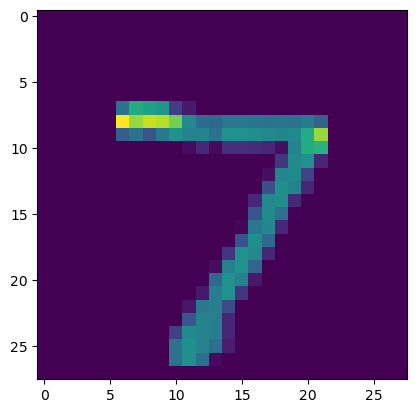

In [35]:
#check the answer
plt.imshow(x_test[0])

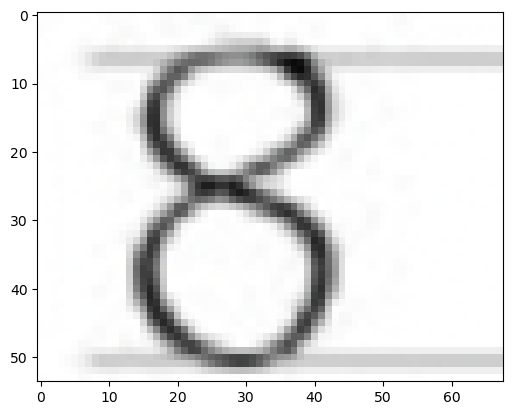

In [38]:
import cv2
img = cv2.imread('/Users/nivetha/Desktop/8.png')
plt.imshow(img)

In [39]:
img.shape

(54, 68, 3)

In [40]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [41]:
img.shape

(54, 68, 3)

In [42]:
resized=cv2.resize(gray,(28,28), interpolation=cv2.INTER_AREA)
resized.shape

(28, 28)

In [43]:
newing = tf.keras.utils.normalize(resized, axis=1)
newing=np.array(newing).reshape(-1,img_size,img_size,1)
newing.shape

(1, 28, 28, 1)

In [44]:
prediction=model.predict(newing)
print(np.argmax(prediction))

1/1 [==============================] - 0s 17ms/step
8
